# What makes a song successful?
Rohan Cowlagi, Samrat Somana, Aryan Kaul
## Introduction

Being a successful musician obviously has its merits of fame and money attached to it, but what’s more interesting is how a musical career can be launched by a single ultra-popular song. Just look at Twenty One Pilots’ climb to success. The alternative rock act had a modest following after the release of albums like “Vessel” in 2013, but things really started to take off after the release of their iconic single, “Stressed Out” in 2015. The song became a [massive hit](https://www.bbc.com/news/entertainment-arts-37910692) and [reached #1](https://www.fuse.tv/2015/12/twenty-one-pilots-stressed-out-no-1-rock-songs-chart) on Billboard’s Hot Rock Songs, staying there for many weeks. Twenty One Pilots then went on to win a Grammy, performed over a thousand shows worldwide, and soon became a household name. Clearly, there is a large incentive in making a song that hits the charts. 

The question is, though, is it possible to know if a song will become popular? More specifically, are there features that make a particular song more likely to commercially succeed? The answer to this question would be very valuable to musicians wanting to break into the music industry: just write songs with the features that make them go viral. Additionally, [record labels](https://exploration.io/what-is-a-record-label/) (organizations that provide monetary resources to artists in exchange for a large portion of the artist’s revenues) could use this to determine which artists have the highest chances of blowing up and give the record label the biggest return on their investment. 

In this project, we will set out to find which features make a song commercially “successful”. In order to accomplish this, we must define what we mean by commercial “success”. There are many different definitions of commercial success within the music industry, but we are going to use the Billboard Charts. These charts have been a metric for popularity of songs in the American music industry for many years, and we are going to focus specifically on the [Billboard Hot 100 Charts](https://www.billboard.com/charts/hot-100/). According to its own website, the Hot 100 is "*This week's most popular songs across all genres, ranked by radio airplay audience impressions, as measured by Nielsen Music, sales data as compiled by Nielsen Music, and streaming activity data provided by online music sources.*" We define any song that has made it to the Billboard Top 100 charts at any point since 1958 as “successful” and any other song in the dataset as “unsuccessful”. We will be using [this](https://www.kaggle.com/dhruvildave/billboard-the-hot-100-songs) dataset from Kaggle which has a collection of the Hot 100 Charts from 1958 up to the present day. 

Our goal for this song dataset is to collect a large number of songs where half are “successful” and the other half are “unsuccessful”. This equal class distribution will make it so we can legitimately compare songs that are successful and unsuccessful within our Exploratory Data Analysis (EDA) and so that our ML models can learn better.

In order to gather song data for our problem, we must look at how music is consumed in the modern era. Streaming has become people’s preferred way to listen to music nowadays. In 2021 it was reported that about [41% of people](https://www.cbsnews.com/news/streaming-tops-radio-as-the-top-way-to-listen-to-music/#:~:text=41%25%20of%20Americans%20now%20primarily,%2C%20cassettes%2C%20or%20vinyl%20records.) in the United States used streaming to listen to music, making it the most popular method. Essentially, streaming is using an internet-based service to listen to music on-demand without downloading audio files. Spotify is one of the most [popular music streaming platforms](https://www.statista.com/statistics/758875/consumers-use-music-streaming-download-services/#:~:text=In%202020%2C%20the%20most%20popular,accessing%20the%20platform%20for%20free.) in the United States right now, so it is a good place to source song data from. Spotify provides an API to request songs along with features corresponding with them (track name, artist name, genre, etc.).

Originally, we wanted to request songs from Spotify directly; however, the problem with the Spotify API is that it does not provide a convenient way to request and aggregate a large number of songs in a streamlined fashion. You can only request songs through specific songs and specific playlists (lists of songs that are meant to be played next to each other). It would be difficult to do this using the Spotify API because we don’t definitively know which playlists/artists we should use. Instead, we decided to use [this](https://www.kaggle.com/siropo/spotify-multigenre-playlists-data?select=metal_music_data.csv) Kaggle dataset that has a collection of CSV files that have songs that have already been requested through the Spotify API. It contains 7 CSV files, each of which contains a colleciton of songs from a particular genre.


# Data Preprocessing

Let's import some of libraries we'll be using for this project

In [ ]:
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler

We import data from the Billboard dataset and store it in our dataframe titled “billboard”. Note that, beforehand, we downloaded all the datasets and then uploaded the files onto a personal Github repo from which we converted the raw CSV file into a pandas dataframe.

In [ ]:
url = 'https://raw.githubusercontent.com/sammy640/320test/main/charts.csv'
billboard = pd.read_csv(url)

Let's take a look at what it looks like!

In [ ]:
billboard.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [ ]:
billboard.isnull().sum()

date                  0
rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64

There seems to be missing values in the last-week column, but this doesn't matter because we won't be using this column.

 Then, we import data from 7 different CSV files, each of which has songs from different genres. We then store each one into a dataframe whose name corresponds to the genre.

In [ ]:
url = 'https://raw.githubusercontent.com/sammy640/320test/main/alternative_music_data.csv'
alternative = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/sammy640/320test/main/blues_music_data.csv'
blues = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/sammy640/320test/main/hiphop_music_data.csv'
hiphop = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/sammy640/320test/main/indie_alt_music_data.csv'
indiealt = pd.read_csv(url)

url = "https://raw.githubusercontent.com/sammy640/320test/main/metal_music_data.csv"
metal = pd.read_csv(url)

url = "https://raw.githubusercontent.com/sammy640/320test/main/pop_music_data.csv"
pop = pd.read_csv(url)

url = "https://raw.githubusercontent.com/sammy640/320test/main/rock_music_data.csv"
rock = pd.read_csv(url)


Let's take a look at one of these genre-based dataframes.

In [ ]:
rock.head()

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,God Street Wine,Nightingale,5,['jam band'],The Lot,0.732,0.710,10,-10.429,1,0.0473,0.12100,0.005720,0.4570,0.825,123.098,6A9mRe1Eg6jUBaiLu1ppAJ,spotify:track:6A9mRe1Eg6jUBaiLu1ppAJ,https://api.spotify.com/v1/tracks/6A9mRe1Eg6jU...,https://api.spotify.com/v1/audio-analysis/6A9m...,352839,4
1,cleopatrick,hometown,63,"['modern alternative rock', 'modern blues rock...",Ultimate Rock Gaming,0.315,0.826,7,-4.314,0,0.0636,0.00064,0.000687,0.0703,0.359,139.161,6p8DGrcAUBuLUgDIKcUn0P,spotify:track:6p8DGrcAUBuLUgDIKcUn0P,https://api.spotify.com/v1/tracks/6p8DGrcAUBuL...,https://api.spotify.com/v1/audio-analysis/6p8D...,256072,4
2,grandson,In Over My Head,60,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,0.0399,0.00170,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4
3,Counting Crows,Bobby and the Rat-Kings,0,"['alternative rock', 'neo mellow', 'pop rock',...",All New Rock,0.470,0.881,5,-4.529,1,0.1330,0.31900,0.000000,0.0856,0.422,141.837,4g3abvA9DjKbjAoRDHWRsx,spotify:track:4g3abvA9DjKbjAoRDHWRsx,https://api.spotify.com/v1/tracks/4g3abvA9DjKb...,https://api.spotify.com/v1/audio-analysis/4g3a...,324867,4
4,Led Zeppelin,Black Dog - Remaster,72,"['album rock', 'classic rock', 'hard rock', 'r...",70s Rock Anthems,0.437,0.864,4,-7.842,0,0.0904,0.39600,0.031400,0.2420,0.749,81.394,3qT4bUD1MaWpGrTwcvguhb,spotify:track:3qT4bUD1MaWpGrTwcvguhb,https://api.spotify.com/v1/tracks/3qT4bUD1MaWp...,https://api.spotify.com/v1/audio-analysis/3qT4...,295387,4


We want to combine all of these genre dataframes into one big dataframe from which we do all of our analysis. In the final combined dataset, we want a column that indicates what genre the song is.

As we can see in the "rock" dataframe, there is a column named "Genres" that contains a list of the genres that song is a part of. The problem is these genres are *very* specific sub-genres of music (have you ever heard of the "neo mellow" sub genre before?) and there is large number of these unique sub-genres. In order to simplify the genre column, we want our "genre" column to only contain whether a song belongs to one of the 7 broader, more generic genres that we have above (rock, pop, metal, alternative, indiealt, blues, hiphop).

Right now, each of the seperate dataframes does not have a column that indicates it belongs to one of the 7 broad genres. Therefore, in each of the smaller dataframes, we will make a new column indicating which genre the songs are. This is relatively simple since, for example, all of the songs in the "rock" dataframe are of the genre "rock". So, the genre column will have the value "rock" for all entries in the rock dataframe. 

First we make a list genre names and a list of the genre dataframes themselves.

In [ ]:
genres = ["rock", "pop", "metal", "alternative", "indiealt", "blues", "hiphop"]
genre_df_lst = [rock, pop, metal, alternative, indiealt, blues, hiphop]

Then, we create the new column "genre" in each of the dataframes. 

In [ ]:
i = 0
for genre_df in genre_df_lst:
  genre_df["genre"] = genres[i]
  i = i + 1

Now, we can combine them into one big dataframe titled “big_ds”. There may be overlap in songs between genre dataframes, so we drop duplicates by song name to take care of this. We also shuffle our dataset to serve the purpose of reducing variance and making sure that the models do not overfit the data.

In [ ]:
big_ds = rock.append(pop).append(metal).append(alternative).append(indiealt).append(blues).append(hiphop) # combining the dataframes into a big dataframe


big_ds = big_ds.sample(frac=1).reset_index(drop=True) # shuffle dataset

big_ds = big_ds.drop_duplicates(subset="Track Name") # getting rid of duplicate song entries


Here, we create our label column named "successful" which indicates whether a song has ever been on the Billboard Hot 100 before. We check if a song has been on the billboard chart by checking if that songs name shows up in the list of values from the billboard dataframe. We don't have to worry about string formatting here because the songs names seem to be in a consistent format.

In [ ]:
big_ds["successful"] = 0 # default 0, will change to 1 if song was ever seen on the billboard

for index, row in big_ds.iterrows():
    if row["Track Name"] in billboard["song"].values:
        big_ds.at[index, "successful"] = 1 # setting label to 1 if song was ever seen on the billboard

Now let's check how many successful and unsuccessful songs we have.

In [ ]:
big_ds["successful"].value_counts()

0    14769
1     2470
Name: successful, dtype: int64

Uh oh! We have a significant class imbalance problem here. Our goal is to have a balanced dataset with half of the dataset containing billboard songs and the other half containing non-billboard songs. At the moment, we have 14769 unsuccesful songs and 2470 successful songs which is a major difference.

We can remedy this by simply sampling 2470 songs unsuccessful from the big_ds and appending it to a new dataframe called final_df and then append all of the successful songs to final_df.

In [ ]:
num_in_billboard = 0
num_not_in_billboard = 0
billboard_max_count = big_ds["successful"].value_counts()[1] # setting label class cap to ensure even counts of label classes

final_df = pd.DataFrame(columns=big_ds.columns)

for index, row in big_ds.iterrows(): # adding song entries until label class cap is reached for both classes
    if row["successful"] == 1:
        if num_in_billboard < billboard_max_count:
            final_df = final_df.append(row)
            num_in_billboard += 1

    elif row["successful"] == 0:
        if num_not_in_billboard < billboard_max_count:
            final_df = final_df.append(row)
            num_not_in_billboard += 1

final_df = final_df.sample(frac=1).reset_index(drop=True)
#temp_df = final_df.copy()

In [ ]:
final_df["successful"].value_counts()

1    2470
0    2470
Name: successful, dtype: int64

In [ ]:
final_df.shape

(4940, 23)

We now have 2470 billboard songs and 2470 non-billboard songs. We also have 23 columns in our dataset.

In [ ]:
final_df.head()

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,successful
0,Mascara,Near,11,[],French Noise,0.137,0.833,8,-7.031,1,0.0633,0.000051,0.305000,0.0933,0.220,157.976,4sy4XhaARpaQ1GmHbuoKec,spotify:track:4sy4XhaARpaQ1GmHbuoKec,https://api.spotify.com/v1/tracks/4sy4XhaARpaQ...,https://api.spotify.com/v1/audio-analysis/4sy4...,296078,4,rock,0
1,Stone Temple Pilots,Trippin' on a Hole in a Paper Heart,0,"['alternative metal', 'alternative rock', 'gru...",Post-Grunge Appreciation Society,0.494,0.951,11,-7.886,0,0.0393,0.000193,0.289000,0.2340,0.724,106.356,6t35bkQQxt6FOpf0lnhqyU,spotify:track:6t35bkQQxt6FOpf0lnhqyU,https://api.spotify.com/v1/tracks/6t35bkQQxt6F...,https://api.spotify.com/v1/audio-analysis/6t35...,190707,4,rock,0
2,Altin Gün,Yüce Dag Basinda,48,"['dutch indie', 'turkish psych']",Modern Psychedelia,0.823,0.569,7,-9.301,0,0.0498,0.057100,0.002420,0.0938,0.831,111.974,5lcqXXSHHdEsugnaAYWOtC,spotify:track:5lcqXXSHHdEsugnaAYWOtC,https://api.spotify.com/v1/tracks/5lcqXXSHHdEs...,https://api.spotify.com/v1/audio-analysis/5lcq...,258316,4,alternative,0
3,Marmozets,Play,39,"['british alternative rock', 'modern alternati...",Full Volume,0.380,0.982,0,-3.287,1,0.1500,0.000266,0.000309,0.3660,0.168,161.095,5hk61Ob5f0kKxKoOGbroMm,spotify:track:5hk61Ob5f0kKxKoOGbroMm,https://api.spotify.com/v1/tracks/5hk61Ob5f0kK...,https://api.spotify.com/v1/audio-analysis/5hk6...,204933,4,rock,1
4,Omer Adam,קוקוריקו,51,"['israeli mediterranean', 'israeli pop', 'mizr...",פופ וים תיכוני: המיטב של 2020,0.787,0.497,10,-7.728,0,0.0396,0.560000,0.000000,0.3040,0.504,111.991,5BqY4WvB0sfGqg4cq25Eto,spotify:track:5BqY4WvB0sfGqg4cq25Eto,https://api.spotify.com/v1/tracks/5BqY4WvB0sfG...,https://api.spotify.com/v1/audio-analysis/5BqY...,171000,4,pop,0


In [ ]:
final_df.isnull().sum()

Artist Name         0
Track Name          0
Popularity          0
Genres              0
Playlist            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
successful          0
dtype: int64

No missing values!

# Exploratory Data Analysis

We can now explore some trends in our song dataset before we move onto the machine learning models.

## Genre Successful vs. Unsuccessful Bar Graph

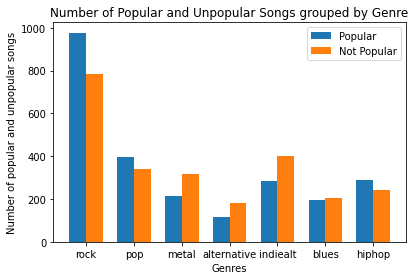

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#x
genres = ["rock", "pop", "metal", "alternative", "indiealt", "blues", "hiphop"]

# y
popular = []
not_popular = []

for genre in genres:
  popular.append(len(final_df.loc[(final_df["genre"] == genre) & (final_df["successful"] == 1)]))
  not_popular.append(len(final_df.loc[(final_df["genre"] == genre) & (final_df["successful"] == 0)]))

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
x = np.arange(len(genres))
rects1 = ax.bar(x - width/2, popular, width, label='Popular')
rects2 = ax.bar(x + width/2, not_popular, width, label='Not Popular')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Number of popular and unpopular songs')
ax.set_xlabel('Genres')
ax.set_title('Number of Popular and Unpopular Songs grouped by Genre')
plt.xticks(x, list(genres))
ax.legend()

fig.tight_layout()

plt.show()

We wanted to determine if a song’s genre is important in determining whether it becomes successful or not. We created a double bar graph that graphed the number of successful and not successful songs for each genre. From the graph, we can infer that hip hop generally has more successful songs than unsuccessful songs. In recent years, hip hop has become the most popular genre, and naturally more hip hop songs have been making it to the billboard charts. Rock and pop were very popular for many years, but their popularity has slowly declined in recent years.


## Time sig. Successful vs. Unsuccessful Bar Graph

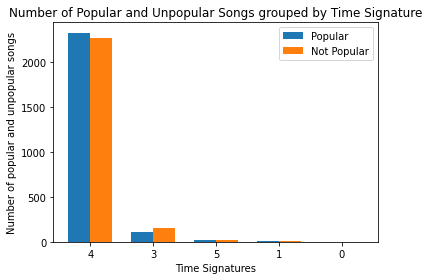

In [ ]:
#x
time_sigs = final_df["time_signature"].unique()

# y
popular = []
not_popular = []

for time_sig in time_sigs:
  popular.append(len(final_df.loc[(final_df["time_signature"] == time_sig) & (final_df["successful"] == 1)]))
  not_popular.append(len(final_df.loc[(final_df["time_signature"] == time_sig) & (final_df["successful"] == 0)]))

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
x = np.arange(len(time_sigs))
rects1 = ax.bar(x - width/2, popular, width, label='Popular')
rects2 = ax.bar(x + width/2, not_popular, width, label='Not Popular')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Number of popular and unpopular songs')
ax.set_xlabel('Time Signatures')
ax.set_title('Number of Popular and Unpopular Songs grouped by Time Signature')
plt.xticks(x, list(time_sigs))
ax.legend()

fig.tight_layout()

plt.show()



We also wanted to determine if a song’s time signature is important in determining whether it becomes successful or not. We created a double bar graph that displayed the number of successful and not successful songs for each time signature in the dataset. From the graph, we can see that 4/4 is the most popular time signature, and it generally has more successful songs than unsuccessful songs. Certain popular songs are not written in this time signature, such as Perfect by Ed Sheeran, but a majority of songs use 4/4. Also, many popular songs are easy to dance to, and the 4/4 time signature is very conducive to dancing.


## Tempo Successful and Unsuccessful Histograms

In [ ]:
min(list(final_df["tempo"]))

0.0

In [ ]:
max(list(final_df["tempo"]))

216.091

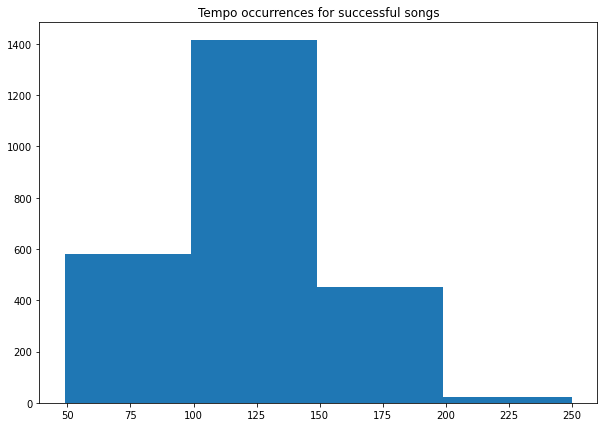

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(final_df[final_df["successful"] == 1]["tempo"], bins = [49, 99, 149, 199, 250])
ax.set_title("Tempo occurrences for successful songs")
plt.show()

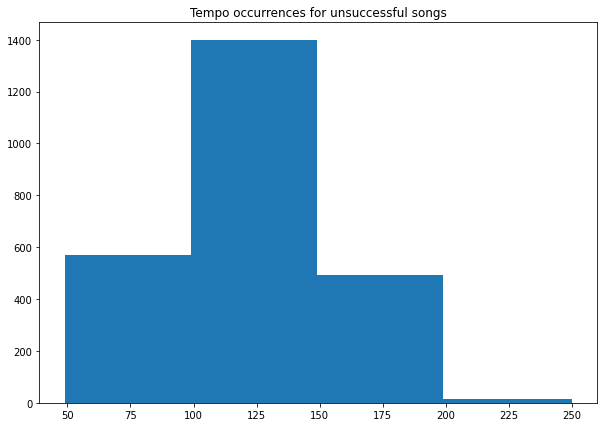

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(final_df[final_df["successful"] == 0]["tempo"], bins = [49, 99, 149, 199, 250])
ax.set_title("Tempo occurrences for unsuccessful songs")
plt.show()

One more variable we wanted to look into is tempo. We created two histograms, one for successful and another for unsuccessful; each graph displays the number of songs with tempos in a range of tempos. From the histograms, we can see that there are many songs that range from 100 to 125 BPM, no matter if it is successful or unsuccessful. One factor we did not account for is equivalent tempos. In certain genres, 160 BPM is also written as 80 BPM. This could skew the dataset to the right because many hip hop songs that are 160 BPM are written as 80 BPM.


## Heat Map

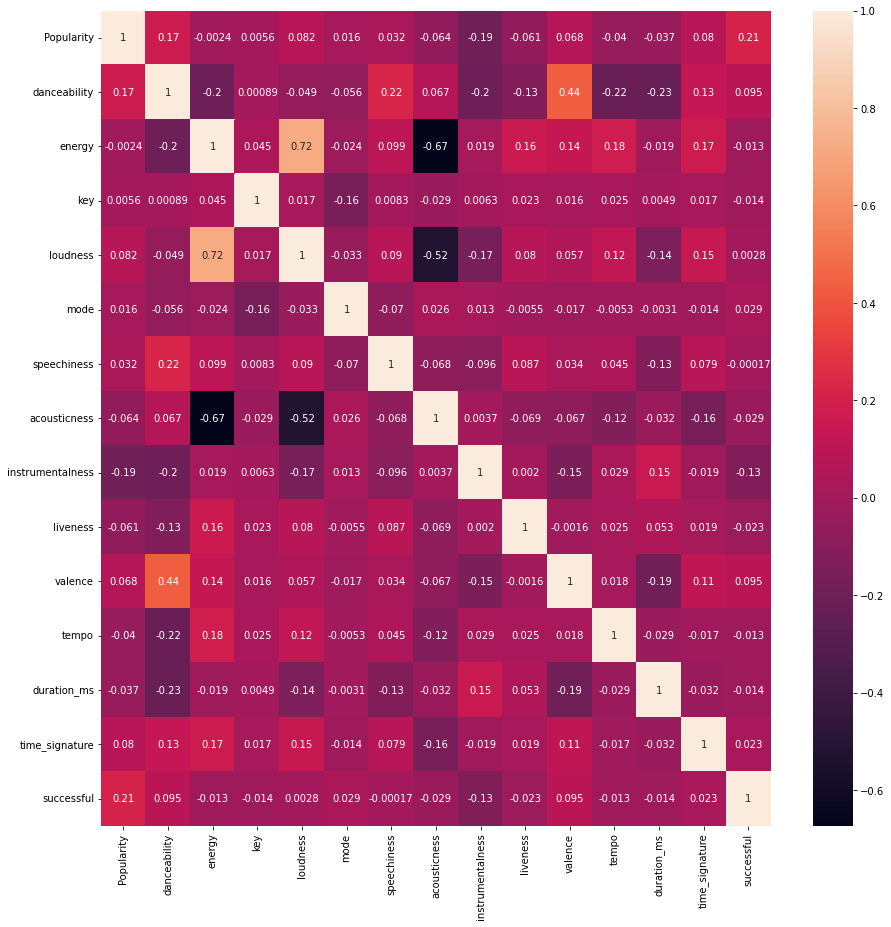

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 15))

sns.heatmap(final_df.corr(), annot=True,
        xticklabels=final_df.corr().columns,
        yticklabels=final_df.corr().columns)

We decided to add a correlation matrix heat map to determine if multicollinearity exists; if this does exist, it could potentially cause problems when creating machine learning models. A majority of the variables are not strongly correlated; however, acousticness and energy as well as acousticness and loudness are pretty highly correlated at 0.72 and -0.67, respectively. So, we will drop the energy column in the machine learning section to prevent conflict with the other predictor variables. 


## OLS Regression

In [ ]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='successful ~ duration_ms+acousticness+danceability+energy+instrumentalness+liveness+loudness+speechiness+tempo+mode+time_signature+key+valence', data=final_df)
res = mod.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:             successful   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     11.31
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           2.05e-24
Time:                        07:04:42   Log-Likelihood:                -3512.8
No. Observations:                4940   AIC:                             7054.
Df Residuals:                    4926   BIC:                             7145.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3333      0.118  

According to the OLS regression, duration, energy, liveness, loudness, speechiness, tempo, time signature, and key are not significant because they have p-values that are greater than or equal to .05. However, with some subject matter expertise, we have decided to keep all of these variables besides energy.


# Machine Learning

Here, we will drop the columns that are unneccessary for our machine learning model. These are columns that wouldn't contribute to the success of a song ('track_href' is just internal link that the Spotify API uses) and columns that would conflict with other predictors (the energy column as we discussed earlier). You'll also notice that we decided to drop the genre column. We did this after running our data on the ML models below and seeing they were the least important features via the charts we created. After we dropped the genre column, we also saw a boost in accuracy for the model.

You will notice that the quantitative predictor columns are not in the same scale. Some of them are fractions below 1, some of them are in the range 1-200, etc. In order to scale all of these columns correctly, we use the in built function from sklearn, StandardScaler.

Finally, we will also split our model into testing and training sets.
We used an 80-20 train-test split. Originally, we were manually creating the 80-20 datasets because we wanted an equal amount of successful and unsuccessful songs in the train and test sets. However, we decided to trust the law of large numbers and simply shuffle our data; this way, we could simply use the built-in train-test function instead of manually splitting the data.


In [ ]:
ml_df = final_df.copy(deep=True)
# ml_df = pd.get_dummies(ml_df, prefix=['Genre'], columns=['genre'])

# ml_df = ml_df.drop(labels=['Artist Name',    'Track Name',    'Popularity',    'Genres', 'Playlist', 'id',    'uri', 'track_href', 'analysis_url'], axis=1)


ml_df = ml_df.drop(labels=['Artist Name', 'Track Name', 'Popularity', 'Genres', 'Playlist', 'id', 'uri', 'track_href', 'analysis_url', 'Genres', 'energy', 'genre'], axis=1)
ml_df['duration_ms'] = ml_df['duration_ms'].astype(int)

ml_df_y = ml_df[["successful"]]
y = ml_df_y
y=y.astype('int')
y

ml_df_x = ml_df.drop(columns=["successful"])

ml_df_x.shape

scaler = StandardScaler()
x = scaler.fit_transform(ml_df_x)
x = pd.DataFrame(x, columns = ml_df_x.columns)
x

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
ml_df_x.dtypes

danceability        float64
key                  object
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature       object
dtype: object

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

## XGBoost 

XGBoost is a type of machine learning model, but the difference between this model and others is the built-in functionality of determining feature importance. After running the model and visualizing the feature importance, we found that loudness, duration, and speechiness are important features.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6907894736842105
0.5799595141700404


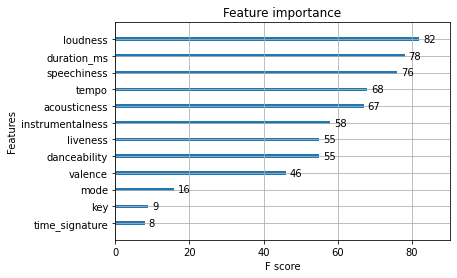

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

xg_model = XGBClassifier()
xg_model.fit(x_train, y_train)


xg_preds_tr = xg_model.predict(x_train)
xg_preds = xg_model.predict(x_test)
print(accuracy_score(y_train, xg_preds_tr))
print(accuracy_score(y_test, xg_preds))

plot_importance(xg_model)
plt.show()

## Neural Networks

In [ ]:
import tensorflow as tf

nn_model = tf.keras.Sequential([tf.keras.Input(ml_df_x.shape[1]),
                                tf.keras.layers.Dense(50, activation = tf.nn.relu),
                                tf.keras.layers.Dense(50, activation = tf.nn.relu),
                                tf.keras.layers.Dense(50, activation = tf.nn.relu),
                                tf.keras.layers.Dense(1, activation = tf.nn.sigmoid),
])
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                650       
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,801
Trainable params: 5,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_model.compile(# set the optimizer of your choice below! Learning rate too, if you want.
              optimizer = 'adam',
              loss = tf.keras.losses.BinaryCrossentropy())

We decided to use 120 epochs because we felt it was enough to effectively train the model while not too many to overfit the model on the training data. An epoch is one iteration of the neural network model.

In [ ]:
import math
nn_model.fit(
    x_train, y_train,
    epochs = 120, 
    steps_per_epoch = math.ceil(x_train.shape[0] / 32))

Epoch 1/120
124/124 [==============================] - 3s 4ms/step - loss: 0.6862
Epoch 2/120
124/124 [==============================] - 0s 4ms/step - loss: 0.6742
Epoch 3/120
124/124 [==============================] - 0s 4ms/step - loss: 0.6685
Epoch 4/120
124/124 [==============================] - 0s 4ms/step - loss: 0.6636
Epoch 5/120
124/124 [==============================] - 1s 4ms/step - loss: 0.6585
Epoch 6/120
124/124 [==============================] - 1s 7ms/step - loss: 0.6528
Epoch 7/120
124/124 [==============================] - 1s 7ms/step - loss: 0.6491
Epoch 8/120
124/124 [==============================] - 1s 8ms/step - loss: 0.6440
Epoch 9/120
124/124 [==============================] - 1s 8ms/step - loss: 0.6410
Epoch 10/120
124/124 [==============================] - 1s 8ms/step - loss: 0.6361
Epoch 11/120
124/124 [==============================] - 1s 8ms/step - loss: 0.6315
Epoch 12/120
124/124 [==============================] - 1s 8ms/step - loss: 0.6274
Epoch 13/120


In [ ]:
nn_preds_tr = nn_model.predict(x_train)
nn_preds_tr = (nn_preds_tr>=0.5)
nn_preds = nn_model.predict(x_test)
nn_preds = (nn_preds>=0.5)
print(accuracy_score(y_train, nn_preds_tr))
print(accuracy_score(y_test, nn_preds))

0.9569838056680162
0.5192307692307693


We decided to try a neural network model because they are known to be very powerful machine learning models. We originally had a shallow model (less layers), but our training accuracy was relatively low. We then decided to try a more dense model (more layers), and our training accuracy increased to 94 percent. However, after tinkering with the layers of this model, we only received a test accuracy of 52 percent. This could potentially be because we overfit to our training data. We are not concerned with the test accuracy because we are not deploying this code; our main goal is interpretability, and having a high training accuracy will allow us accurately determine which features are the most important in determining whether a song is “successful” or not.


In order to determine which features are most important in determing whether a song is successful, we can use Shap, a library that extracts feature importances from machine learning models.

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.5 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.KernelExplainer(nn_model.predict,x_train)

Using 3952 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In order to prevent Shap from taking an incredibly long time to run, we only ran it on 50 values as opposed to the entire test set.

In [ ]:
shap_values = explainer.shap_values(x_test[:50],nsamples=5)

  0%|          | 0/50 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.692e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.692e-03, with an active set of 4 regressors

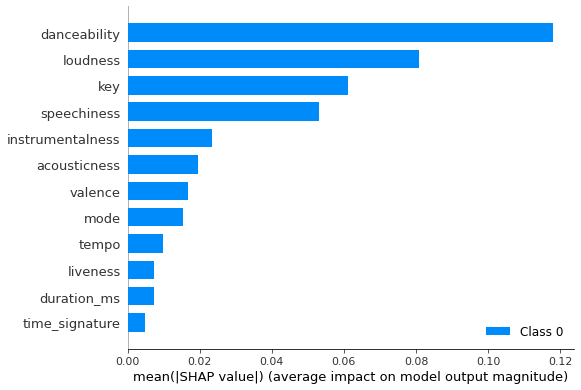

In [ ]:
shap.summary_plot(shap_values,x_test[:50],feature_names=x_test.columns)

Based on this plot, we can see that dancebility and loudness are two key features in determining whether a song is succesful. This differs slightly from XGBoost as it thought duration was the most important feature, and Shap for the neural network thought it was an insignificant feature.